In [8]:
import os
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim.downloader as api

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Use punkt_tab for newer versions of nltk to avoid lookup errors
nltk.download('punkt_tab', quiet=True) 

print("Setup Complete.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deves\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deves\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Setup Complete.


In [9]:
print("Loading Google Word2Vec Model (word2vec-google-news-300)...")
print("This might take a few minutes if downloading for the first time.")

# Load the model via Gensim API
wv = api.load('word2vec-google-news-300')

print(f"✅ Model loaded successfully!")
print(f"Vocabulary size: {len(wv.index_to_key)} words")
print(f"Vector dimensions: {wv.vector_size}")

Loading Google Word2Vec Model (word2vec-google-news-300)...
This might take a few minutes if downloading for the first time.
[===-----------------------------------------------] 8.0% 132.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.7% 160.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.4% 188.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.3% 288.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.7% 461.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.5% 490.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.2% 534.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.9% 563.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.9% 597.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.5% 640.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 40.3% 670.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.1% 699.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.8% 728.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.6% 758.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.4% 787.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.6% 940.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.0% 997.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.7% 1026.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.5% 1055.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.5% 1089.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.5% 1122.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.5% 1155.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.8% 1193.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.8% 1226.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.6% 1256.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.2% 1284.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.0% 1313.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.8% 1359.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.5% 1389.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.6% 1422.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.2% 1450.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 90.0% 1496.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.7% 1524.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.4% 1553.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 96.4% 1603.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.2% 1632.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.9% 1661.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




✅ Model loaded successfully!
Vocabulary size: 3000000 words
Vector dimensions: 300


Loaded 1000 reviews.
Preprocessing text...
Generating sentence representations...

--- Example Preprocessing ---
Original: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even t...
Tokens:   ['sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even']
Vector Shape: (300,)


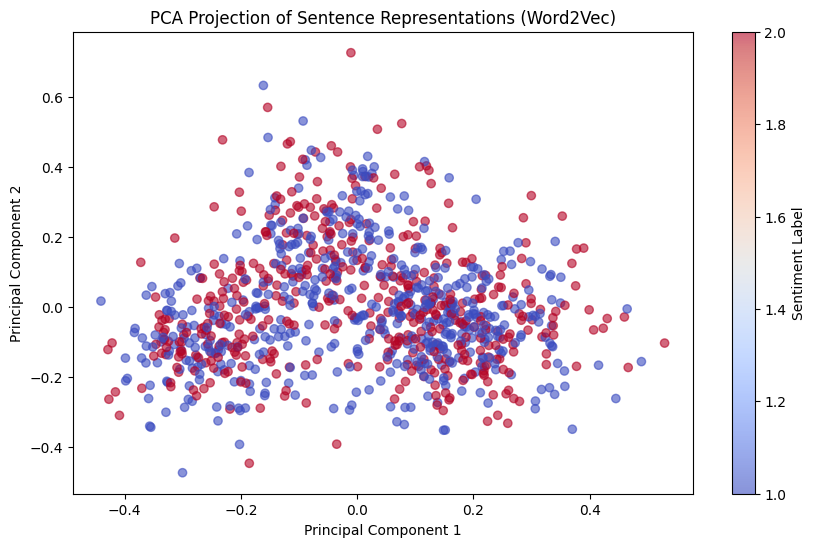

Plot saved as 'sentence_vectors_pca.png'


In [11]:
# 1. Load Amazon Reviews Dataset
try:
    # Reading first 1000 rows for speed. Adjust as needed.
    df = pd.read_csv('amazon_reviews.csv', header=None, nrows=1000)
    df.columns = ['label', 'title', 'text']
    print(f"Loaded {len(df)} reviews.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Using dummy data for demonstration...")
    df = pd.DataFrame({'label': [1, 0], 'text': ["Great fast delivery!", "Terrible bad late product."]})

# 2. Preprocessing Function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # a. Convert to lowercase
    text = str(text).lower()
    # b. Remove punctuation and numbers (keep only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # c. Tokenize text
    tokens = word_tokenize(text)
    # d. Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    return tokens

print("Preprocessing text...")
df['tokens'] = df['text'].apply(preprocess_text)

# 3. Sentence Representation (Mean of Word Vectors)
def get_sentence_vector(tokens):
    # Fetch vectors only for words that exist in the Word2Vec vocabulary
    vectors = [wv[word] for word in tokens if word in wv]
    if len(vectors) == 0:
        return np.zeros(wv.vector_size) # Return vector of zeros if no words found
    # Average the vectors
    return np.mean(vectors, axis=0)

print("Generating sentence representations...")
df['sentence_vec'] = df['tokens'].apply(get_sentence_vector)

print("\n--- Example Preprocessing ---")
print(f"Original: {df['text'].iloc[0][:100]}...")
print(f"Tokens:   {df['tokens'].iloc[0][:10]}")
print(f"Vector Shape: {df['sentence_vec'].iloc[0].shape}")

# 4. Visualization: Plot Sentence Vectors using PCA
# We reduce the 300D vectors to 2D to plot them
vecs = np.vstack(df['sentence_vec'].values)
pca = PCA(n_components=2)
vecs_2d = pca.fit_transform(vecs)

plt.figure(figsize=(10, 6))
# Color by sentiment label (assuming 1/2 or 0/1)
scatter = plt.scatter(vecs_2d[:, 0], vecs_2d[:, 1], c=df['label'], cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection of Sentence Representations (Word2Vec)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Sentiment Label")
plt.savefig('sentence_vectors_pca.png')
plt.show()
print("Plot saved as 'sentence_vectors_pca.png'")

In [12]:
print("--- Q2: Testing Specific Analogies ---")
# Equation: w2 - w1 + w3 = w4
# gensim format: most_similar(positive=[w2, w3], negative=[w1])

# a) good - bad + excellent = ? 
# w1=bad, w2=good, w3=excellent
res_a = wv.most_similar(positive=['good', 'excellent'], negative=['bad'], topn=3)
print(f"a) good - bad + excellent = \n   Predictions: {[w[0] for w in res_a]}")

# b) delivery - late + fast = ?
# w1=late, w2=delivery, w3=fast
res_b = wv.most_similar(positive=['delivery', 'fast'], negative=['late'], topn=3)
print(f"b) delivery - late + fast = \n   Predictions: {[w[0] for w in res_b]}")

print("\n--- Downloading Analogy Dataset ---")
url = "https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt"
file_name = "questions-words.txt"
if not os.path.exists(file_name):
    urllib.request.urlretrieve(url, file_name)
    print("Downloaded 'questions-words.txt'.")
else:
    print("File already exists.")

print("\n--- Minimizing the Search Space ---")
print("""
To minimize the search space of 3 million words, we use two techniques:
1. 'restrict_vocab': We limit the analogy search to the top N most frequent words. 
   Rare words (like typos or obscure names) are pushed to the end of the Word2Vec vocabulary.
   Limiting to the first 300,000 words removes 90% of the search space (noise) and speeds up evaluation.
2. 'fill_norms()': We pre-calculate the L2 norms of all vectors. This allows us to use 
   fast matrix dot-products instead of calculating cosine similarity mathematically every time.
""")

import time

# Pre-calculate L2 norms for blazing fast dot products
wv.fill_norms() 

# Evaluate on a small subset of the file to save time in lab
print("Evaluating accuracy on questions-words.txt (Using Top 300,000 words only)...")
start_time = time.time()

# We use restrict_vocab=300000 to drop the search space from 3 Million -> 300k
accuracy = wv.evaluate_word_analogies('questions-words.txt', restrict_vocab=300000)

end_time = time.time()

# The evaluate function returns a tuple: (overall_score, detailed_results)
overall_score = accuracy[0]
print(f"\nOptimization Results:")
print(f"Accuracy: {overall_score * 100:.2f}%")
print(f"Time taken (optimized): {end_time - start_time:.2f} seconds")

--- Q2: Testing Specific Analogies ---
a) good - bad + excellent = 
   Predictions: ['terrific', 'superb', 'fantastic']
b) delivery - late + fast = 
   Predictions: ['delievery', 'twitch_muscles', 'Delivery']

--- Downloading Analogy Dataset ---
Downloaded 'questions-words.txt'.

--- Minimizing the Search Space ---

To minimize the search space of 3 million words, we use two techniques:
1. 'restrict_vocab': We limit the analogy search to the top N most frequent words. 
   Rare words (like typos or obscure names) are pushed to the end of the Word2Vec vocabulary.
   Limiting to the first 300,000 words removes 90% of the search space (noise) and speeds up evaluation.
2. 'fill_norms()': We pre-calculate the L2 norms of all vectors. This allows us to use 
   fast matrix dot-products instead of calculating cosine similarity mathematically every time.

Evaluating accuracy on questions-words.txt (Using Top 300,000 words only)...

Optimization Results:
Accuracy: 74.01%
Time taken (optimized): 2